In [ ]:
!pip install -r requirements.txt

In [ ]:
!python -m visdom.server -port 8098

In [1]:
!start http://localhost:8098/

Training the model MFCGAN, here we penalize the gradient of the generator with lambda_GA = 2e-2

In [ ]:
!python train.py --dataroot ./datasets/involute/ --name involute_pen_grad_20 --lambda_GA 2e-2 --n_epochs_decay 400 --n_epochs 100 --display_port 8098

In [1]:
import torch
from models import networks
import matplotlib.pyplot as plt
G_A = networks.define_G([1],[2],'ffnet_9layers',9,'instance',False)

initialize network with normal


In [2]:
weight_file = './checkpoints/involute_pen_grad_20/latest_net_G_A.pth'
state_dict = torch.load(weight_file)
G_A.load_state_dict(state_dict)

<All keys matched successfully>

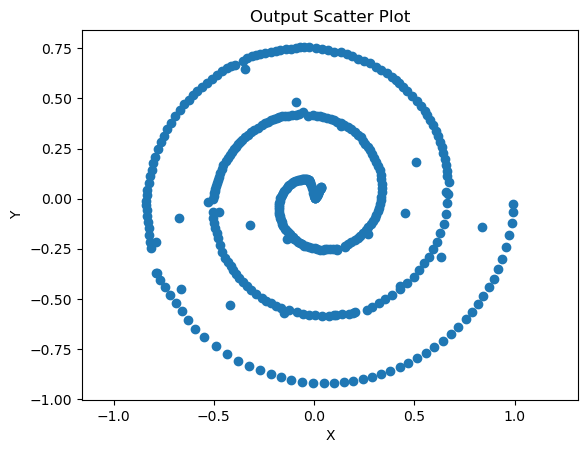

In [4]:
input_data = torch.linspace(0, 1, 400).view(-1, 1,1)

# Pass the input through the model
output_data = G_A(input_data)

# Extract the x and y values from the output
x_values = output_data[:, 0].detach().numpy()
y_values = output_data[:, 1].detach().numpy()

# Plot the scatter plot
plt.scatter(x_values, y_values)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Output Scatter Plot')
plt.axis('equal')
plt.show()

In [5]:
import os
import numpy as np

dir = 'results/involute/'
if not os.path.exists(dir):
    # Create the directory if it doesn't exist
    os.makedirs(dir)

input_data = torch.rand(10000).view(-1, 1, 1)

# Pass the input through the model
output_data = G_A(input_data)
output_data = output_data.view(-1, 2)
noisy_data = output_data + torch.randn(output_data.size()) * 0.01
noisy_data = noisy_data.detach().numpy()
output_data = output_data.detach().numpy()
np.savetxt(dir+'data_out.csv', output_data, delimiter=',')
np.savetxt(dir+'data_noise.csv', noisy_data, delimiter=',')
